# Bilddaten

Digitale Bilder bestehen aus drei Farbwerten (rot, grün, blau) pro Pixel, d.h. Bildelement. Aus diesen drei Werten wird bei der Darstellung die gewünschte Farbe zusammengestellt. Der Wertebereich ist dabei entweder zwischen 0 und 255 (8-bit) oder als Gleitkommazahl zwischen 0 und 1.   

In [50]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

Im weiteren wird <a href="./campus_haspel.jpeg" download>ein Bild vom Campus Haspel</a> zur Demonstration verwendet. Die Bilddaten können mit der `plt.imread`-Funktion als dreidimensionales Array von 8-bit vorzeichenlosen ganzen Zahlen eingelesen werden.

In [64]:
data = plt.imread('./campus_haspel.jpeg')
print( "Form:", data.shape )
print( "Datentyp der Elemente:", data.dtype)

Form: (3024, 4032, 3)
Datentyp der Elemente: uint8


In [54]:
# Auszug aus den dreidimensionalem Datensatz
print( data )

[[[ 52  41  45]
  [ 46  35  39]
  [ 42  33  34]
  ...
  [ 58  46  32]
  [ 54  37  19]
  [ 52  32   8]]

 [[ 46  37  38]
  [ 43  34  35]
  [ 43  34  35]
  ...
  [ 58  46  34]
  [ 59  43  27]
  [ 52  34  14]]

 [[ 37  33  30]
  [ 38  34  31]
  [ 40  37  32]
  ...
  [ 50  40  28]
  [ 53  39  26]
  [ 55  42  26]]

 ...

 [[128 105  91]
  [123 104  89]
  [121 105  89]
  ...
  [  9  14  10]
  [  5  14   9]
  [  8  21  14]]

 [[134  94  86]
  [126  94  83]
  [113  94  79]
  ...
  [ 12  14  11]
  [  4  13   8]
  [  4  17   8]]

 [[138  93  88]
  [133  99  90]
  [120 101  87]
  ...
  [ 12  14  11]
  [  5  15   7]
  [  3  16   7]]]


Mit der bereits vorgestellten Funktion `plt.imshow` kann das Bild in Echtfarben dargestellt werden. Dies funktioniert, da die Funktion die einzelnen Ebenen, hier der letzte Index, des Datensatzes als Farbinformationen (rot, grün, blau) interpretiert. Wäre noch eine vierte Ebene dabei, würde sie als individueller Transparenzwert verwendet worden.

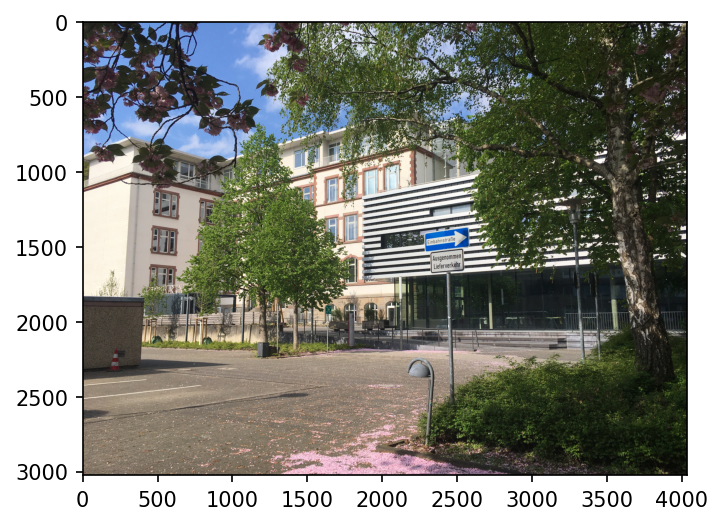

In [55]:
plt.imshow( data );

Natürlich können auch die einzelnen Farbebenen individuell betrachtet werden. Dazu wird der letzte Index festgehalten.

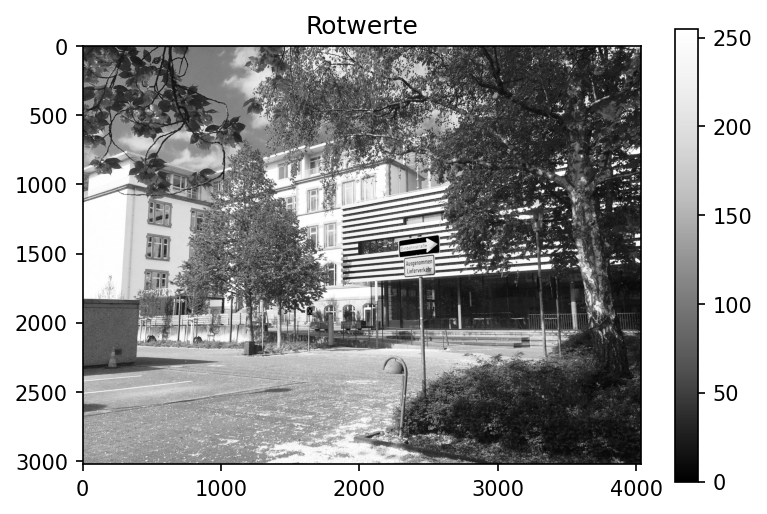

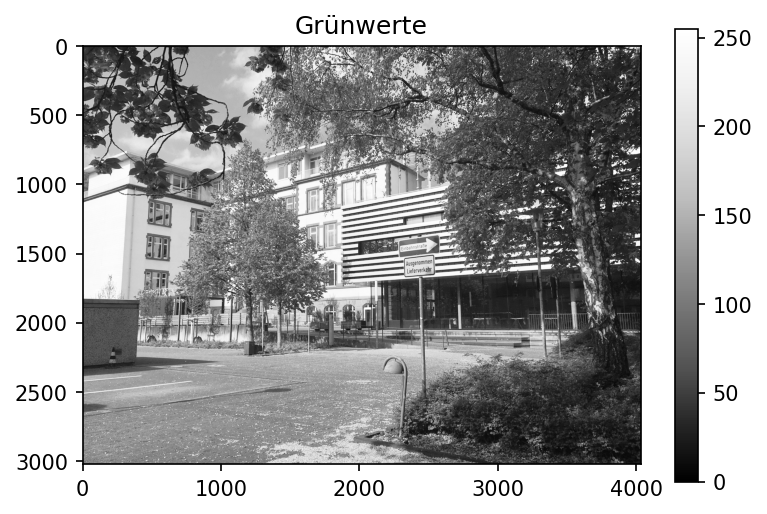

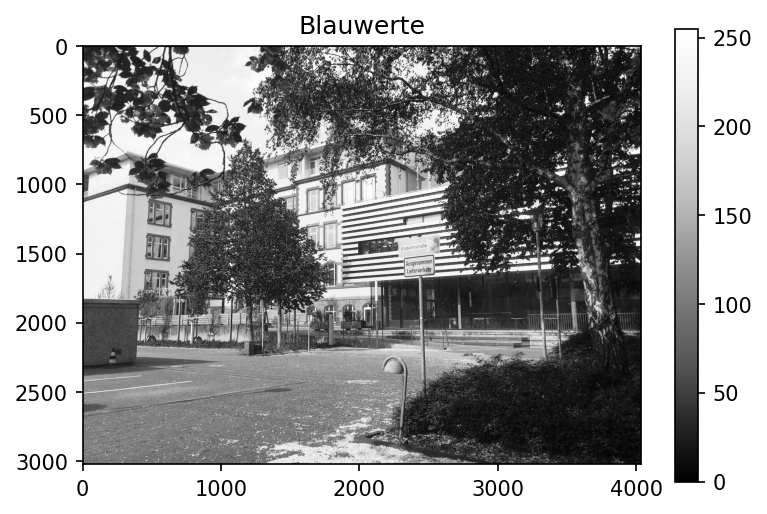

In [61]:
titel = ["Rotwerte", "Grünwerte", "Blauwerte"]

for i in range(3):
    # Als Farbskale wird die invertierte '_r' Grauskala 
    # verwendet 'Greys'
    plt.imshow( data[:,:,i], cmap='Greys_r' )
    plt.title(titel[i])
    plt.colorbar()
    plt.show()


Da die Bilddaten als Arrays gespeichert sind, sind viele der möglichen Optionen, z.B. zur Teilauswahl oder Operationen, verfügbar. Das untere Beispiel zeigt einen Ausschnitt im Rotkanal des Bildes. 

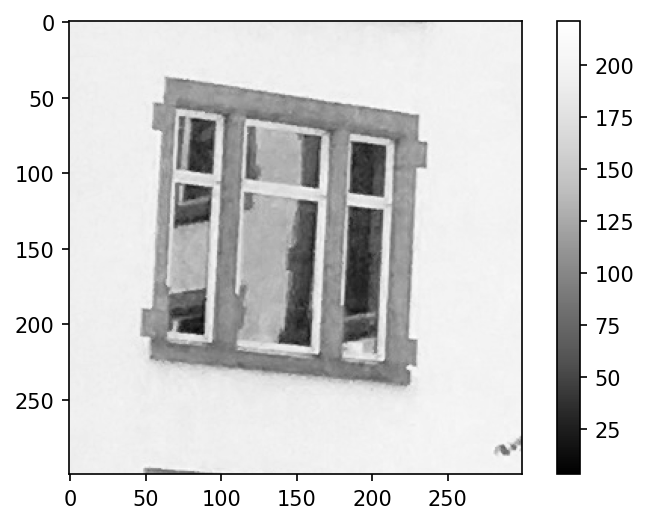

In [62]:
bereich = np.array(data[1320:1620, 400:700, 0], dtype=float)
plt.imshow( bereich, cmap="Greys_r" )
plt.colorbar();

Als Beispiel für eine Bildoperation wird der Laplace-Operator vorgestellt. Er kann genutzt werden um Ränder von Objekten zu identifizieren. Dazu wird für jeden Bildpunkt $\sf B_{i,j}$ – außer an den Rändern – folgender Wert $\sf \phi_{i, j}$ berechnet:

$$ \sf \phi_{i, j} = \left|B_{i-1, j} + B_{i, j-1} - 4\cdot B_{i, j} + B_{i+1, j} + B_{i, j+1}\right| $$

Folgende Funktion implementiert diese Operation. Darüber hinaus werden alle Werte von $\sf \phi$ unterhalb eines Schwellwerts auf Null und oberhalb auf 255 gesetzt.

In [65]:
def img_lap(data, schwellwert=25):
    
    # Erstellung einer Kopie der Daten, nun jedoch als
    # Array mit Gleitkommazahlen
    bereich = np.array(data, dtype=float)
    
    # Aufteilung der obigen Gleichung in zwei Teile
    lapx = bereich[2:, :] - 2*bereich[1:-1, :] + bereich[:-2, :]
    lapy = bereich[:, 2:] - 2*bereich[:, 1:-1] + bereich[:, :-2]
    
    # Zusammenführung der Teile und Bildung des Betrags
    lap = np.abs(lapx[:,1:-1] + lapy[1:-1, :])
    
    # Schwellwertanalyse
    lap[lap > schwellwert] = 255
    lap[lap < schwellwert] = 0
    
    return lap

Die Anwendung des Laplace-Operators auf den oberen Bildausschnitt ergibt folgende Ausgabe. Hier sind deutlich die Umrisse der Bildstrukturen erkennbar.

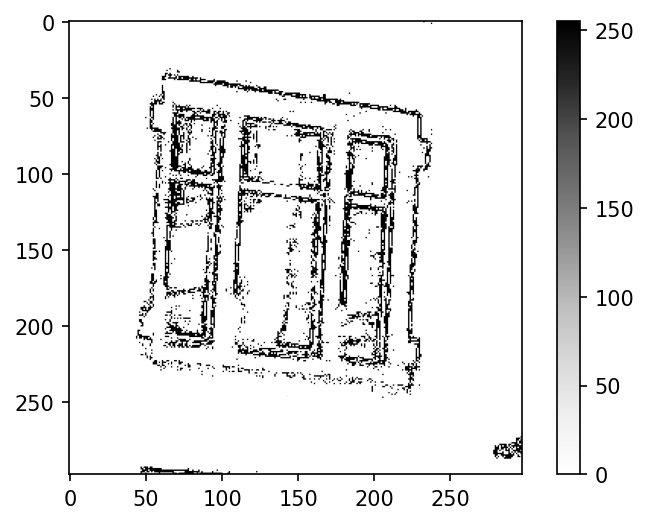

In [71]:
lap = img_lap(bereich)
plt.imshow(lap, cmap="Greys")
plt.colorbar();

Zum Vergleich noch beide Abbildungen nebeneinander. Im folgenden wird die Funktion `plt.subplot` verwendet, welche mehrere Graphiken in einer Abbildung ermöglicht. Beispiele und Dokumentation sind beispielsweise [hier](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html) zu finden.

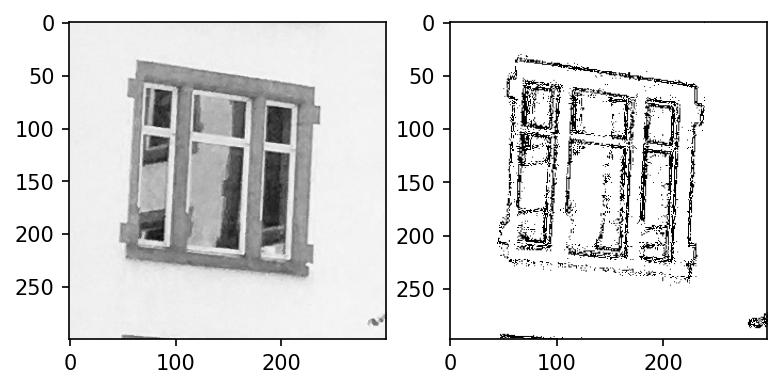

In [74]:
ax = plt.subplot(1, 2, 1)
ax.imshow(bereich, cmap="Greys_r")

ax = plt.subplot(1, 2, 2)
ax.imshow(lap, cmap="Greys");